# EDA and Data Cleaning

---

## Distribution of SMILES and Spectrum for GC-MS Dataset

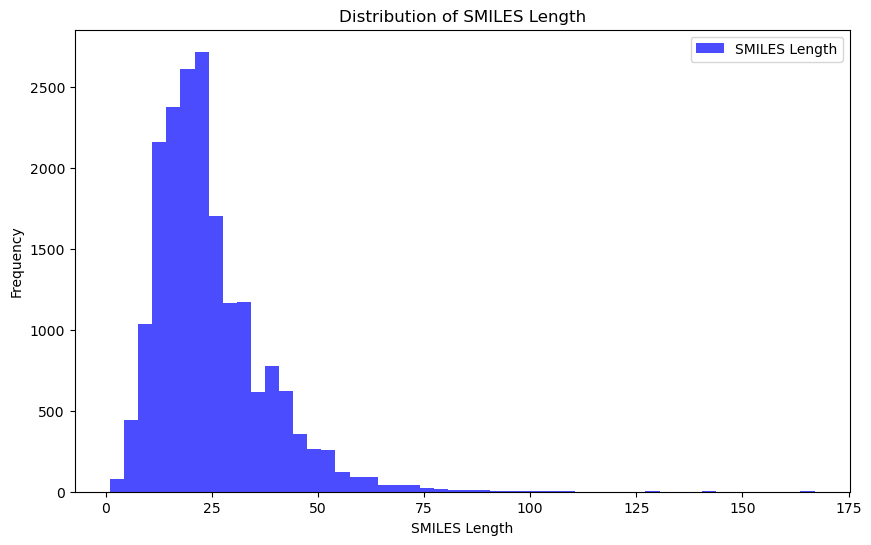

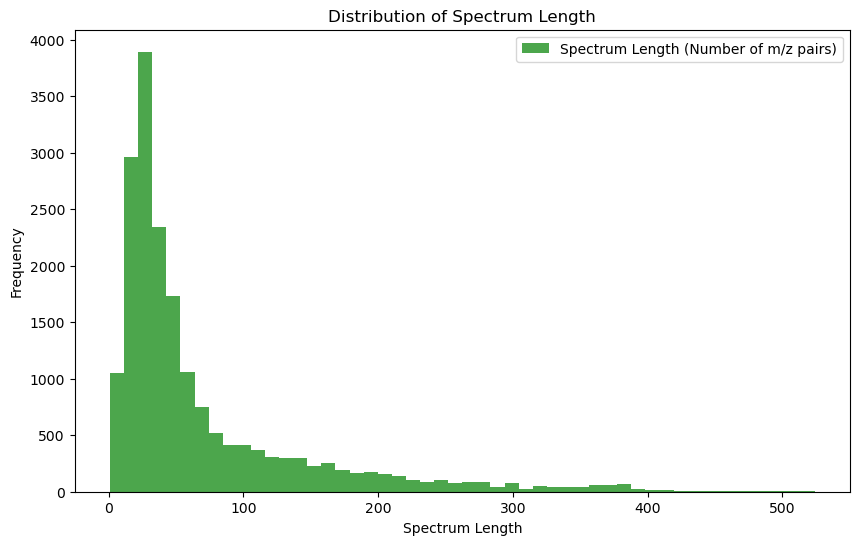

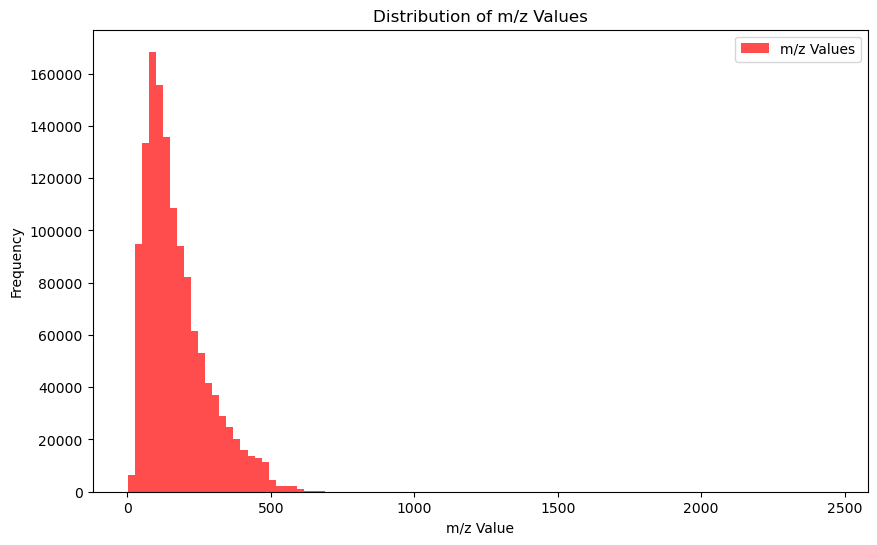

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data
df = pd.read_csv('gc_spec.csv')
df = df.dropna(subset=['SMILES', 'Spectrum'])

# smiles length
df['smiles_length'] = df['SMILES'].apply(len)

# spectrum length
def parse_spectrum(spectrum_str):
    pairs = spectrum_str.split()
    return len(pairs)

df['spectrum_length'] = df['Spectrum'].apply(parse_spectrum)

# m/z distribution
def extract_mz_values(spectrum_str):
    pairs = spectrum_str.split()
    mz_values = [float(pair.split(':')[0]) for pair in pairs]  # some m/z are floats
    return mz_values

df['mz_values'] = df['Spectrum'].apply(extract_mz_values)
all_mz_values = [mz for sublist in df['mz_values'] for mz in sublist]

# plot smiles length distribution
plt.figure(figsize=(10, 6))
plt.hist(df['smiles_length'], bins=50, color='blue', alpha=0.7, label='SMILES Length')
plt.xlabel('SMILES Length')
plt.ylabel('Frequency')
plt.title('Distribution of SMILES Length')
plt.legend()
plt.show()

# plot spectrum length distribution
plt.figure(figsize=(10, 6))
plt.hist(df['spectrum_length'], bins=50, color='green', alpha=0.7, label='Spectrum Length (Number of m/z pairs)')
plt.xlabel('Spectrum Length')
plt.ylabel('Frequency')
plt.title('Distribution of Spectrum Length')
plt.legend()
plt.show()

# plot m/z value distribution
plt.figure(figsize=(10, 6))
plt.hist(all_mz_values, bins=100, color='red', alpha=0.7, label='m/z Values')
plt.xlabel('m/z Value')
plt.ylabel('Frequency')
plt.title('Distribution of m/z Values')
plt.legend()
plt.show()


## GC-MS SMILES Vocab EDA

Unique Characters in SMILES and Their Counts:
' ': 2
'#': 397
'(': 45874
')': 45874
'+': 67
',': 1
'-': 85
'.': 153
'1': 24032
'2': 10166
'3': 4399
'4': 1838
'5': 366
'6': 78
'7': 14
'=': 56038
'@': 54
'A': 1
'B': 323
'C': 205307
'F': 977
'G': 10
'H': 1055
'I': 64
'N': 9840
'O': 41601
'P': 352
'S': 2908
'Z': 1
'[': 2911
'\': 4
']': 2911
'a': 39
'c': 228
'd': 2
'e': 14
'g': 1
'i': 1830
'l': 1608
'n': 106
'o': 3
'r': 313
's': 2
't': 1
'u': 2

Total Unique Characters (Vocabulary Size): 45


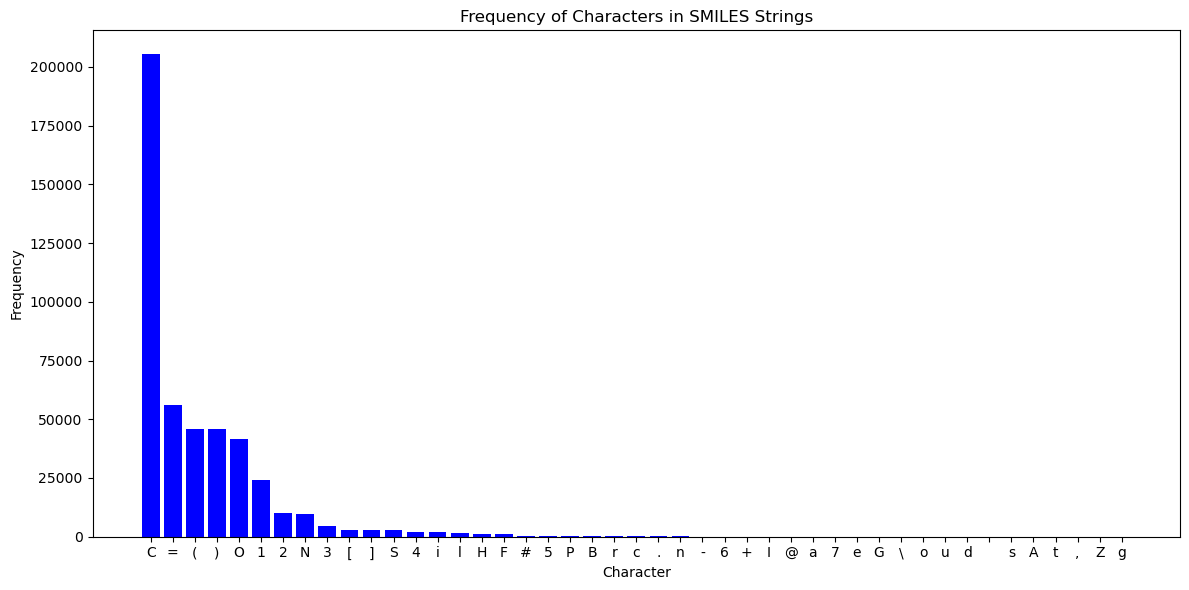

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the CSV file
data = pd.read_csv('consolidated_chem_data.csv')

# Extract the SMILES column and ensure it's treated as strings
smiles_data = data['SMILES'].astype(str)

# Combine all SMILES strings into one string
all_smiles = ''.join(smiles_data)

# Count the frequency of each unique character
char_counts = Counter(all_smiles)

# Extract the unique characters (vocabulary) and their counts
unique_chars = sorted(char_counts.keys())
unique_counts = [char_counts[char] for char in unique_chars]

# Print the unique characters and their count
print("Unique Characters in SMILES and Their Counts:")
for char, count in zip(unique_chars, unique_counts):
    print(f"'{char}': {count}")

print(f"\nTotal Unique Characters (Vocabulary Size): {len(unique_chars)}")

# Extract characters and counts for plotting
chars, counts = zip(*sorted(char_counts.items(), key=lambda x: x[1], reverse=True))

# Plot the frequencies
plt.figure(figsize=(12, 6))
plt.bar(chars, counts, color='blue')
plt.title('Frequency of Characters in SMILES Strings')
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.xticks()
plt.tight_layout()
plt.show()


# Data Cleaning

smiles.csv from a collection of MoleculeNet Datasets

In [17]:
# dataframe 
df = pd.read_csv('smiles.csv')
df.shape

(706862, 1)

In [18]:
# selecting only SMILES under 75 characters based on distribution
df = df[df['smiles'].apply(len) < 75]
df.shape

(662657, 1)

In [24]:
# order smiles by length  
df.to_csv('smiles_filtered.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('smiles_filtered.csv')

smiles_data = data['smiles'].astype(str)

# define allowed characters
allowed_chars = set(":#()+,-.1234567=@ABCDFGHINOPSZ[]acdegilnorst")

# filter
filtered_smiles = smiles_data[smiles_data.apply(lambda x: all(char in allowed_chars for char in x))]

filtered_smiles.to_csv('filtered_smiles.csv', index=False)